# File d'attente, un exemple simple

Cet exemple vient illustrer le paragraphe sur les files d'attente et l'espérance de vie des ampoules.

In [1]:
%matplotlib inline

In [2]:
import random


def generate_expo(mu):
    return random.expovariate(mu)


generate_expo(2)

0.0749720223112896

Les paramètres de la simulation.

In [3]:
S = 10000
iteration = 500
mu = 1.0 / 100

On crée un tableau de ``S`` ampoules qui contient la durée de vie restante de chaque ampoule.

In [4]:
ampoule = [0 for a in range(S)]
moyenne_grille = 0
stats = []


for i in range(iteration):
    grille = 0
    mean = 0

    for n in range(S):
        mean += ampoule[n]
        if ampoule[n] == 0:
            # remplacement d'une ampoule grillée
            grille += 1
            # on détermine la durée de vie de cette ampoule
            # on arrondit à l'entier le plus proche
            ampoule[n] = int(generate_expo(mu))
        else:
            # on enlève une heure à la durée de vie de l'ampoule
            ampoule[n] -= 1

    mean /= S

    stats.append(dict(i=i, mean=mean, grille=grille))

    if i > 0:
        moyenne_grille += grille
    if i % 100 == 0:
        print("itération : ", i, " moyenne durée : ", mean, " grillées :", grille)

moyenne_grille = float(moyenne_grille) / float(iteration - 1)
print("nombre moyen d'ampoules grillées :", moyenne_grille)

itération :  0  moyenne durée :  0.0  grillées : 10000
itération :  100  moyenne durée :  99.7184  grillées : 95
itération :  200  moyenne durée :  98.7154  grillées : 93
itération :  300  moyenne durée :  99.2155  grillées : 101
itération :  400  moyenne durée :  98.9101  grillées : 108
nombre moyen d'ampoules grillées : 99.88577154308618


In [5]:
import pandas

df = pandas.DataFrame(stats)
df = df[["i", "mean", "grille"]]
df["grille_sum"] = df["grille"].cumsum() - 10000
df.head()

,i,mean,grille,grille_sum
0,0,0.0000,10000,0
1,1,98.5142,99,99
2,2,98.5526,91,190
3,3,98.3991,108,298
4,4,98.4425,94,392


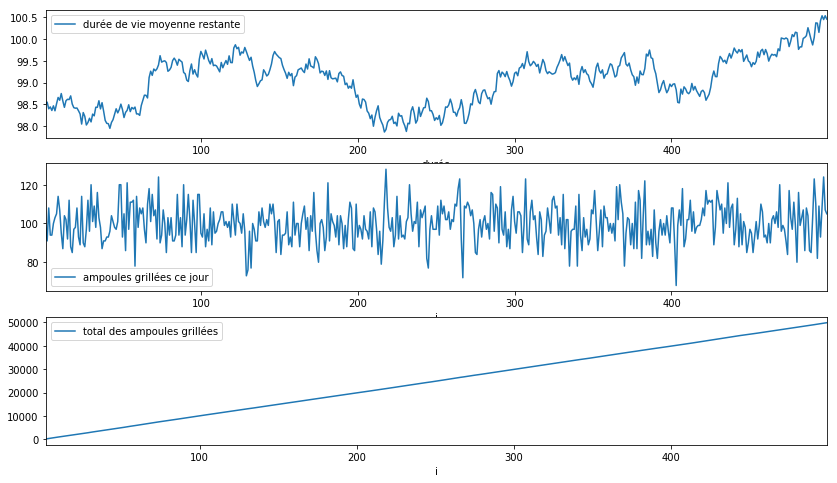

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(14, 8))
df[1:].plot(x="i", y="mean", label="durée de vie moyenne restante", ax=ax[0])
df[1:].plot(x="i", y="grille", label="ampoules grillées ce jour", ax=ax[1])
df[2:].plot(x="i", y="grille_sum", label="total des ampoules grillées", ax=ax[2])
ax[0].set_xlabel("durée")